This notebook was used to select an appropriate model for classification and to determine if our data performs.

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, f1_score

In [2]:
import os
os.chdir('..')
!pwd

/datasets/home/home-00/10/410/rcgonzal/DSC180Malware/m2v-adversarial-hindroid


In [3]:
all_apps = pd.read_csv("data/out/all-apps/all_apps.csv", index_col='app')

all_apps_features =  pd.read_csv('data/out/all-apps/features.csv', index_col='uid')
all_apps_features['app'] = all_apps_features.index.map(
    pd.read_csv('data/out/all-apps/app_map.csv', index_col='uid').app
)
all_apps_features['malware'] = (all_apps_features['app'].map(all_apps.category)=='malware').astype(int)
all_apps_features['category'] = all_apps_features.app.map(all_apps.category)
all_apps_features

train = pd.read_csv('data/out/training-sample/app_map.csv', usecols=['app'])
train = all_apps_features.set_index('app').loc[train.app]
train

test_sample = all_apps_features[np.logical_not(
    all_apps_features.app.apply(lambda x: x in train.index)
)]
test_sample['category'] = test_sample.app.map(all_apps.category)
test_sample = test_sample[test_sample.category!='random-apps']
test_sample

# train = pd.read_csv('data/out/training-sample/features.csv', index_col='uid')
# train['app'] = train.index.map(
#     pd.read_csv('data/out/training-sample/app_map.csv', index_col='uid').app
# )
# train['malware'] = (train['app'].map(all_apps.category)=='malware').astype(int)

<ipython-input-3-d3cb92280d59>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_sample['category'] = test_sample.app.map(all_apps.category)


,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,app,malware,category
uid,,,,,,,,,,,,,,,,,,,,,
app5446,-0.476279,2.268959,-2.755762,1.597183,2.673441,1.849241,-2.522095,-1.284808,2.541356,3.080412,...,2.010017,-2.025746,3.472606,-1.561590,-3.817216,0.728646,0.365744,com.google.android.talk,0,popular-apps
app5171,1.470532,-2.988160,0.392848,0.020504,-0.983816,1.055314,0.597020,0.034490,0.076415,0.376295,...,1.365787,-1.499443,3.125631,-1.281288,-0.378134,2.349084,-1.676432,com.microsoft.todos,0,popular-apps
app5374,2.048100,-0.327995,-1.435501,-1.467651,-2.040421,1.271383,0.420789,-0.462777,2.513764,-0.870451,...,0.625382,-1.302928,1.580561,0.047220,-0.905272,0.491899,-0.198638,com.microsoft.office.excel,0,popular-apps
app5219,0.677821,-1.736358,2.886845,0.561845,-1.923683,-0.806634,-0.556021,-0.458666,2.697061,0.798873,...,-2.942050,-1.074907,1.682648,2.091434,1.709264,-2.132873,-0.978989,com.lulu.lulubox,0,popular-apps
app5174,-0.162714,1.316879,0.532370,-0.178196,0.029661,2.090916,-0.805412,1.063268,2.785719,0.833759,...,-2.171556,-0.094169,1.099069,2.133923,-1.300584,-0.296403,0.675712,com.hulu.plus,0,popular-apps
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
app1558,0.176812,0.204318,-0.227854,-0.098419,-0.157619,0.395741,-0.018977,0.135971,0.295759,0.060932,...,-0.245092,-0.186990,0.379605,-0.071329,-0.117921,-0.010628,0.040637,252fda900a531117c90e97783410f495,1,malware
app1571,0.111105,0.132408,-0.260086,-0.008404,-0.010985,0.356875,0.030650,0.044481,0.174619,0.086255,...,-0.208207,-0.159917,0.193705,-0.111334,-0.075096,-0.058469,-0.060203,1edecf2b3dc5a702cd5052065a352d38,1,malware
app1801,0.298643,0.147146,-0.309600,-0.120062,-0.060548,0.267255,-0.086146,0.089899,0.208934,0.150273,...,-0.178314,-0.222737,0.221994,-0.199572,-0.153552,-0.067176,-0.119831,936687fb892c0e86486de15080d9b4e6,1,malware


In [4]:
X_train, y_train = train.drop(columns=['malware', 'category']), train.malware
X_test, y_test = test_sample.drop(columns=['app', 'malware', 'category']), test_sample.malware

In [5]:
model = RandomForestClassifier(max_depth=3, n_jobs=-1)  # probably overfit
model.fit(X_train, y_train)

print(classification_report(model.predict(X_train), y_train))
print(classification_report(model.predict(X_test), y_test))
f1_score(model.predict(X_test), y_test)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       171
           1       1.00      1.00      1.00      2457

    accuracy                           1.00      2628
   macro avg       0.97      0.99      0.98      2628
weighted avg       1.00      1.00      1.00      2628

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       135
           1       1.00      1.00      1.00      2490

    accuracy                           1.00      2625
   macro avg       0.97      1.00      0.98      2625
weighted avg       1.00      1.00      1.00      2625



0.9979879275653923

In [6]:
performance_data = []

for frac in np.arange(.01, 1.01, 0.01):
    for i in range(5):
        sample = train.sample(frac=frac)
        X, y = sample.drop(columns=['malware', 'category']), sample.malware

        model = RandomForestClassifier(max_depth=3, n_jobs=-1)
        model.fit(X, y)

        performance_data.append([frac, f1_score(model.predict(X_test), y_test)])
    
performance_chart = pd.DataFrame(performance_data, columns=['Training size', 'f1-score'])
performance_chart['Training size'] = performance_chart['Training size'] * train.shape[0]
performance_chart = performance_chart.groupby('Training size').mean()
performance_chart

,f1-score
Training size,
26.28,0.972359
52.56,0.980881
78.84,0.979454
105.12,0.985913
131.40,0.992342
...,...
2522.88,0.997506
2549.16,0.997666
2575.44,0.997586


<AxesSubplot:title={'center':'Model performance by training set size'}, xlabel='Training size\n(Number of apps)'>

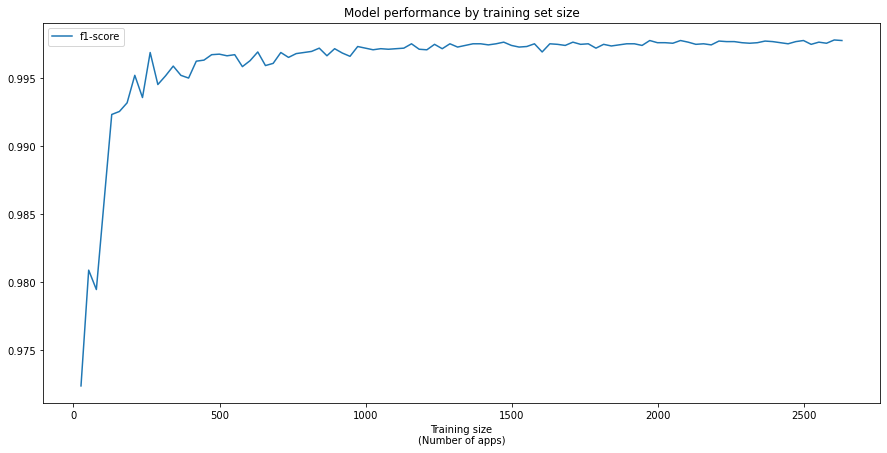

In [18]:
performance_chart.plot(kind='line', 
                       figsize=(15,7), 
                       title="Model performance by training set size",
                       xlabel="Training size\n(Number of apps)"
                      )